<a href="https://colab.research.google.com/github/lvisentin/ds-projects/blob/main/Compound%20interest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib
import datetime
import numpy as np

In [ ]:
def calculate_actual_balance(contribution, time, interest_rate):
    interest_rate = interest_rate / 100
    formula = contribution * ((pow(1 + interest_rate, time) - 1) / interest_rate)
    return formula

def calculate_contributions_over_time(contribution, time):
  total_contributions = 0
  for i in range(time):
    total_contributions += contribution
  return total_contributions

def calculate_contributions(contribution, time): 
  contributions_obj = {}
  for i in range(1, time + 1):
    contributions_obj[i] = calculate_contributions_over_time(contribution, i)
  
  return contributions_obj

def calculate_wealth(contribution, time, interest_rate):
  wealth_obj = {}
  for i in range(1, time + 1):
    wealth_obj[i] = round(calculate_actual_balance(contribution, i, interest_rate), 2)

  return wealth_obj

Text(0, 0.5, 'Valor acumulado (em reais)')

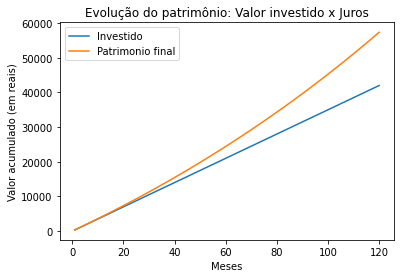

In [ ]:
time = 120
contribution = 350
interest_rate = 0.5

wealth_obj = calculate_wealth(contribution, time, interest_rate)
contributions_obj = calculate_contributions(contribution, time)

wealth_series = pd.Series(wealth_obj, name="Patrimonio")
contrib_series = pd.Series(contributions_obj, name="Contributions")

model = {"Investido": contrib_series.values, "Patrimonio final": wealth_series.values}

final_df = pd.DataFrame(model)
final_df.index = np.arange(1, len(final_df) + 1)

graph = final_df.plot(title="Evolução do patrimônio: Valor investido x Juros")
graph.set_xlabel("Meses")
graph.set_ylabel("Valor acumulado ( e")
